In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


# Load the dataset


In [ ]:
df=pd.read_csv('infolimpioavanzadoTarget.csv')
df.head()

In [48]:
df.shape

(7781, 1285)

# Display basic statistics of the dataset

In [49]:
df.describe()

open         high          low        close     adjclose  \
count  7781.000000  7781.000000  7781.000000  7781.000000  7781.000000   
mean     34.990220    35.655999    34.301243    34.964414    34.483147   
std      99.841502   101.451058    98.073945    99.790823    98.603879   
min       0.410000     0.435000     0.405000     0.408000     0.408000   
25%       4.050000     4.130000     3.980000     4.030000     3.960000   
50%      10.080000    10.110000    10.005000    10.080000    10.061000   
75%      24.350000    24.500000    24.080000    24.250000    22.466007   
max     795.739990   799.359985   784.960022   797.489990   783.376221   

             volume  RSIadjclose15  RSIvolume15  RSIadjclose25  RSIvolume25  \
count  7.781000e+03    7316.000000  7316.000000    7006.000000  7006.000000   
mean   7.586022e+05      46.817434    49.814790      46.966016    49.898659   
std    3.934491e+06      11.672838     5.002664       8.760961     3.420371   
min    0.000000e+00       6.837461    35.303213      17.693637    39.520876   
25%    1.080000e+04      38.946316    47.182234      40.954487    48.266978   
50%    8.406000e+04      46.259711    48.356834      46.459477    48.961162   
75%    6.724000e+05      54.061089    50.902284      52.289893    50.527067   
max    1.615550e+08      96.365095    99.622735      91.023108    97.782293   

       ...      high-15         K-15         D-15  stochastic-k-15  \
count  ...  7347.000000  7262.000000  7194.000000      7262.000000   
mean   ...    37.947291    18.673824    18.704812        18.673824   
std    ...   107.340294    75.723295    74.210933        75.723295   
min    ...     0.510000  -668.212635  -626.263336      -668.212635   
25%    ...     4.565000     6.153839     8.336837         6.153839   
50%    ...    10.640000    28.484828    28.478797        28.484828   
75%    ...    25.170000    59.688404    58.664021        59.688404   
max    ...   799.359985   100.000000   100.000000       100.000000   

       stochastic-d-15  stochastic-kd-15  volumenrelativo         diff  \
count      7194.000000       7194.000000      7566.000000  7626.000000   
mean         18.704812          0.298413              inf    -0.259186   
std          74.210933         14.661948              NaN     7.334250   
min        -626.263336       -211.219037         0.000000   -90.538818   
25%           8.336837         -6.585432         0.637237    -0.417873   
50%          28.478797          0.000000         1.000000    -0.025000   
75%          58.664021          6.726947         1.655385     0.240000   
max         100.000000        198.156313              inf   120.256775   

         INCREMENTO       TARGET  
count   7626.000000  7781.000000  
mean      -2.674224     0.183010  
std      268.268134     0.386699  
min   -23399.465955     0.000000  
25%       -4.494383     0.000000  
50%       -0.304004     0.000000  
75%        2.812552     0.000000  
max      425.000000     1.000000  

[8 rows x 1283 columns]

# Checking the data types and missing values

- > There are many NULL values in the dataset as following.

In [143]:
df.isnull().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64

In [144]:
df.isnull()

date   open   high    low  close  adjclose  volume  ticker  \
0     False  False  False  False  False     False   False   False   
1     False  False  False  False  False     False   False   False   
2     False  False  False  False  False     False   False   False   
3     False  False  False  False  False     False   False   False   
4     False  False  False  False  False     False   False   False   
...     ...    ...    ...    ...    ...       ...     ...     ...   
7776  False  False  False  False  False     False   False   False   
7777  False  False  False  False  False     False   False   False   
7778  False  False  False  False  False     False   False   False   
7779  False  False  False  False  False     False   False   False   
7780  False  False  False  False  False     False   False   False   

      RSIadjclose15  RSIvolume15  ...  high-15   K-15   D-15  stochastic-k-15  \
0              True         True  ...     True   True   True             True   
1              True         True  ...     True   True   True             True   
2              True         True  ...     True   True   True             True   
3              True         True  ...     True   True   True             True   
4              True         True  ...     True   True   True             True   
...             ...          ...  ...      ...    ...    ...              ...   
7776          False        False  ...    False  False  False            False   
7777          False        False  ...    False  False  False            False   
7778          False        False  ...    False  False  False            False   
7779          False        False  ...    False  False  False            False   
7780          False        False  ...    False  False  False            False   

      stochastic-d-15  stochastic-kd-15  volumenrelativo   diff  INCREMENTO  \
0                True              True            False  False       False   
1                True              True            False  False       False   
2                True              True            False  False       False   
3                True              True            False  False       False   
4                True              True            False  False       False   
...               ...               ...              ...    ...         ...   
7776            False             False            False   True        True   
7777            False             False            False   True        True   
7778            False             False            False   True        True   
7779            False             False            False   True        True   
7780            False             False            False   True        True   

      TARGET  
0      False  
1      False  
2      False  
3      False  
4      False  
...      ...  
7776   False  
7777   False  
7778   False  
7779   False  
7780   False  

[7781 rows x 1285 columns]

In [51]:
df.corr

<bound method DataFrame.corr of             date       open       high        low      close   adjclose  \
0     2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000   
1     2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000   
2     2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001   
3     2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000   
4     2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000   
...          ...        ...        ...        ...        ...        ...   
7776  2022-12-23  23.250000  23.540001  23.250000  23.290001  22.699928   
7777  2022-12-27  23.350000  23.610001  23.250000  23.350000  22.758406   
7778  2022-12-28  23.450001  23.570000  23.219999  23.350000  22.758406   
7779  2022-12-29  23.330000  23.740000  23.330000  23.610001  23.011820   
7780  2022-12-30  23.680000  23.760000  23.610001  23.610001  23.011820   

      volume ticker  RSIadjclose15  RSIvolume15  ...    high-15    

In [122]:
feature=df.iloc[:,1:5]
feature.head()
target=df.TARGET
target.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

# Checking if any character or string type entries are there or not

In [123]:
pd.to_numeric(df.open,errors='coerce')

0       17.799999
1       17.700001
2       17.580000
3       16.650000
4       16.219999
          ...    
7776    23.250000
7777    23.350000
7778    23.450001
7779    23.330000
7780    23.680000
Name: open, Length: 7781, dtype: float64

# Creating Correlation matrix

[]

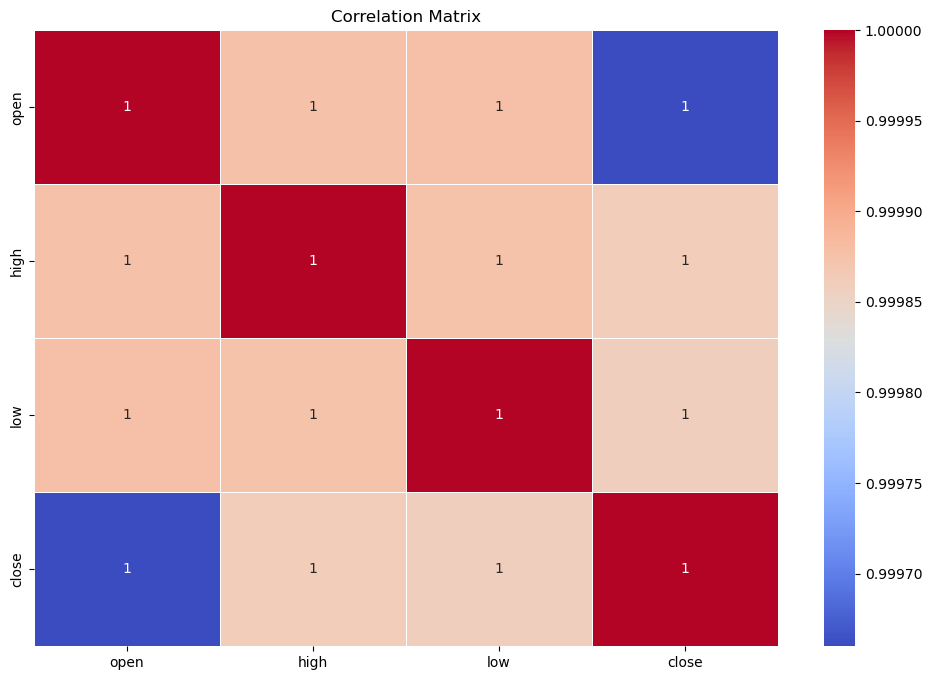

In [124]:
plt.figure(figsize=(12, 8))
g=sns.heatmap(feature.corr(),annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.plot()

# Checking the weight of selected features

In [125]:
model = ExtraTreesClassifier()
model.fit(feature,target)
print(model.feature_importances_)

[0.23970509 0.25658095 0.2495694  0.25414456]


# Graphical representation of weight

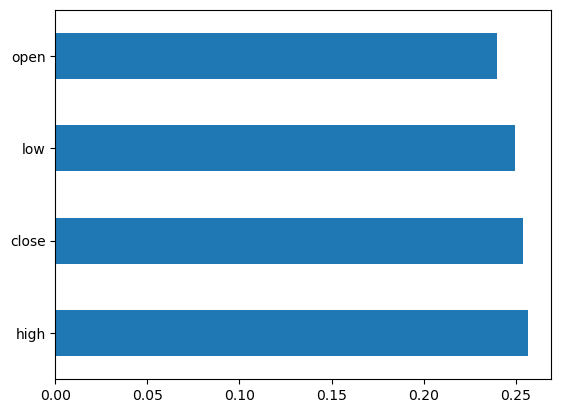

In [126]:
feat_importances = pd.Series(model.feature_importances_, index=feature.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Ploting box-plot for oberving outliers

- > By observing the box-plot,we can that in the selected feature there are most of data is in the category of outlier.But as i am using RandomForestClassifier,outliers can easily be handled.

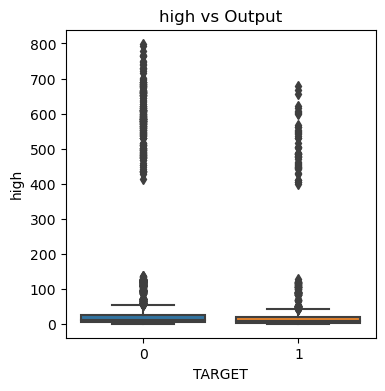

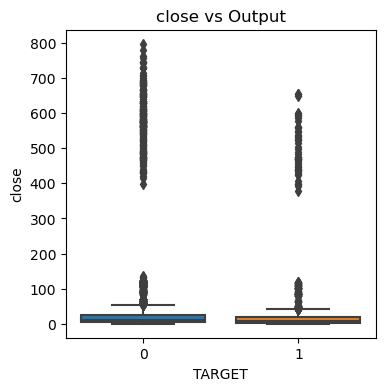

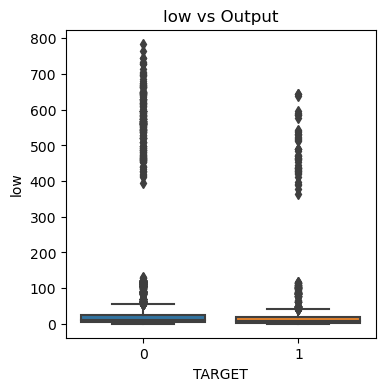

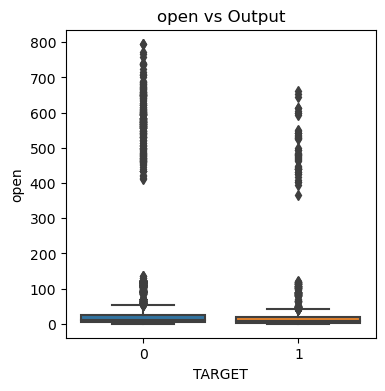

In [127]:
numerical_features = ['high','close','low','open']
for feature in numerical_features:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x='TARGET', y=feature, data=df)
    plt.title(f'{feature} vs Output')
    plt.show()

# Split the data into training and testing sets

In [130]:
X_train, X_test, y_train, y_test=train_test_split(feature,target,test_size=0.4)

ValueError: Found input variables with inconsistent numbers of samples: [4, 7781]

# Create and train the RandomForestClassifier model

# Reason for using this model :

- >Robustness to Overfitting : Random Forest reduces the risk of overfitting by aggregating the predictions of multiple decision trees.
- >Robust to Noise :  Random Forests are less sensitive to noisy data.
- >Parallelization : The training of individual trees in a Random Forest can be efficient for large datasets typical in stock market analysis.

In [131]:
model=RandomForestClassifier(n_estimators=100,criterion='gini',)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7877152402981239

In [140]:
predicts=[2.3,2.8,5.6,5.5]
inputs=np.asarray(predicts).reshape(1,-1)
model.predict(inputs)

C:\Users\princ\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)